## Topic Modelling pada Web Mining

Langkah-langkah:


1.   Crawling data
2.   Preprocessing data (Cleansing data dan stopword)
3.   Modelling LSA


### 1. Pengertian Web Mining

**Web Content Mining** merupakan suatu proses otomatis untuk menemukan
informasi yang berguna dari dokumen atau data. Pada prinsipnya teknik ini mengekstraksi kata kunci yang terkandung pada dokumen. Teknik Web Content Mining berfokus pada penggalian informasi dari isi (content) yang ada pada sebuah web, seperti teks, gambar, audio, video, metadata dan hyperlink. Ada dua strategi yang umum digunakan:

1.   Langsung melakukan mining terhadap data
2.   Melakukan pencarian serta mengimprove hasil pencarian seperti layaknya search engine (Srivastava et al, 2000).


Web Content Mining juga dapat disebut sebagai Web Text Mining yang dalam implementasi biasanya penggalian data terletak pada daerah teks. Teknik ini juga lebih banyak berhubungan dengan disiplin information retrieval (IR), tetapi dengan inovasi yang terus menerus dan seiring dengan perkembangan dunia teknologi informasi, secara dramatis akan meningkatkan akurasi dalam analisis dan mampu menghemat biaya (Hermanto dan Sartono, _). 

### 2. Pengertian Data Crawling

**Data Crawling** merupakan proses pengumpulan data sekunder yang mampu memilah informasi secara cepat dan otomatis tanpa ada reduplikasi data. Proses ini memiliki kaitan dengan data scraping. Begitu semua data telah terkumpul melalui crawling, data scraping akan mengeksekusinya.

Dataset yang digunakan adalah hasil crawling data pada **Portal Tugas Akhir Universitas Trunojoyo Madura**. Dapat diakses melalui link https://pta.trunojoyo.ac.id/.

Berikut adalah kode program untuk proses crawling data yang menghasilkan sejumlah 93 data. Dengan rincian terdapat 7 kolom yaitu kolom Judul, Penulis, Pembimbing 1, Pembimbing 2, abstrak, Kata Kunci dan Label. Untuk pelabelan dilakukan secara manual.

Untuk video tutorialnya dapat diakses pada link Youtube berikut https://youtu.be/uDeoJtYMbEU.

### 3. Preprocessing Data

**Data preprocessing** merupakan proses yang mengubah data mentah ke dalam bentuk yang lebih mudah dipahami. Proses ini penting dilakukan karena data mentah sering kali tidak memiliki format yang teratur. Selain itu, data mining juga tidak dapat memproses data mentah, sehingga proses ini sangat penting dilakukan untuk mempermudah proses berikutnya, yakni analisis data.

Langkah-langkah preprocessing data:

1.   Cleansing data
2.   Stopword



#### 1. Import Module

In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import nltk
nltk.download('stopwords')
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 2. Memuat Dataset

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head(54)

,Dokumen,abstrak
0,1,Tujuan penelitian ini adalah untuk mengidentif...
1,2,Tujuan penelitian ini adalah untuk mengetahui ...
2,3,Tujuan penelitian ini adalah mendeskripsikan i...
3,4,PLN merupakan Badan Usaha Milik Negara yang be...
4,5,Penelitian ini mengungkapkan beberapa rumusan ...
5,6,"Haryono Arifin, Pengaruh Perilaku Konsumen Ter..."
6,7,Hasil dari penelitian ini dari perhitungan Cre...
7,8,"Dharma Abidin Syah,Kesimpulan: (1) Terdapat pe..."
8,9,Tujuan penelitian ini adalah untuk mengidentif...
9,10,"Penelitian ini menggunakan metode kuantitatif,..."


Hanya kolom **'abstrak'** yang akan diproses.

In [4]:
# drop the publish date.
df.drop(['Dokumen'],axis=1,inplace=True)

In [5]:
df.head(54)

,abstrak
0,Tujuan penelitian ini adalah untuk mengidentif...
1,Tujuan penelitian ini adalah untuk mengetahui ...
2,Tujuan penelitian ini adalah mendeskripsikan i...
3,PLN merupakan Badan Usaha Milik Negara yang be...
4,Penelitian ini mengungkapkan beberapa rumusan ...
5,"Haryono Arifin, Pengaruh Perilaku Konsumen Ter..."
6,Hasil dari penelitian ini dari perhitungan Cre...
7,"Dharma Abidin Syah,Kesimpulan: (1) Terdapat pe..."
8,Tujuan penelitian ini adalah untuk mengidentif...
9,"Penelitian ini menggunakan metode kuantitatif,..."


#### 3. Cleaning Data dan Preprocessing Data

Proses ini merupakan preprocessing data dengan menggunakan lemmatizer dan bisa juga menggunakan stemmer. Melakukan stopword pada kata yang telah digunakan bersama dengan kata-kata dengan panjang lebih pendek dari 3 karakter untuk mengurangi beberapa kata yang menyimpang.

In [6]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [7]:
# time taking
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
df['abstrak_cleaned_text']=df['abstrak'].apply(clean_text)

[nltk_data] Downloading package wordnet to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Windows
[nltk_data]     10\AppData\Roaming\nltk_data...


[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
df.head(54)

,abstrak,abstrak_cleaned_text
0,Tujuan penelitian ini adalah untuk mengidentif...,Tujuan penelitian mengidentifikasi variabel-va...
1,Tujuan penelitian ini adalah untuk mengetahui ...,Tujuan penelitian pengaruh variabel Retailing ...
2,Tujuan penelitian ini adalah mendeskripsikan i...,Tujuan penelitian mendeskripsikan inovasi keun...
3,PLN merupakan Badan Usaha Milik Negara yang be...,Badan Usaha Milik Negara bergerak bidang penye...
4,Penelitian ini mengungkapkan beberapa rumusan ...,Penelitian rumusan pelaporan biaya kualitas me...
5,"Haryono Arifin, Pengaruh Perilaku Konsumen Ter...",Haryono Arifin Pengaruh Perilaku Konsumen Terh...
6,Hasil dari penelitian ini dari perhitungan Cre...,Hasil penelitian perhitungan Credit Risk Ratio...
7,"Dharma Abidin Syah,Kesimpulan: (1) Terdapat pe...",Dharma Abidin Syah Kesimpulan Terdapat pengaru...
8,Tujuan penelitian ini adalah untuk mengidentif...,Tujuan penelitian mengidentifikasi variabel-va...
9,"Penelitian ini menggunakan metode kuantitatif,...",Penelitian metode kuantitatif menekankan pengu...


Dapat melihat perbedaan setelah penghapusan stopwords dan beberapa kata yang lebih pendek. Juga kata-kata telah dilemmatisasi seperti dalam 'yang', 'dengan', 'adalah', dll.

Kemudian gunakan kolom yang belum diproses.

In [9]:
df.drop(['abstrak'],axis=1,inplace=True)

In [10]:
df.head(54)

,abstrak_cleaned_text
0,Tujuan penelitian mengidentifikasi variabel-va...
1,Tujuan penelitian pengaruh variabel Retailing ...
2,Tujuan penelitian mendeskripsikan inovasi keun...
3,Badan Usaha Milik Negara bergerak bidang penye...
4,Penelitian rumusan pelaporan biaya kualitas me...
5,Haryono Arifin Pengaruh Perilaku Konsumen Terh...
6,Hasil penelitian perhitungan Credit Risk Ratio...
7,Dharma Abidin Syah Kesimpulan Terdapat pengaru...
8,Tujuan penelitian mengidentifikasi variabel-va...
9,Penelitian metode kuantitatif menekankan pengu...


Kita juga bisa melihat headline berita tertentu.

In [11]:
df['abstrak_cleaned_text'][0]

'Tujuan penelitian mengidentifikasi variabel-variabel mempengaruhi minat ulang nasabah layanan Internet Banking parsial simultan Penelitian metode kuantitatif dimana populasi penelitian nasabah kota Bangkalan layanan Internet Banking diperoleh sampel responden diambil teknik purposive sampling Teknik analisis regresi linier berganda Hasil penelitian simultan pengaruh signifikan variabel bebas persepsi manfaat persepsi kemudahan keamanan ketersediaan fitur minat ulang internet banking parsial variabel bebas berpengaruh positif signifikan minat ulang layanan internet banking kecuali variabel persepsi kemudahan kecuali variabel persepsi kemudahan._x000D_Kata Kunci Persepsi Manfaat Persepsi Kemudahan Keamanan Ketersediaan Fitur Minat Ulang Menggunakan Internet Banking'

#### 4. Mengekstraksi Fitur dan Membuat Document Term Matrix (DTM)

Dalam DTM nilainya adalah nilai TFidf. Tentukan beberapa parameter dari vectorizer Tfidf. Beberapa poin penting:

1.   LSA umumnya diimplementasikan dengan nilai Tfidf di mana-mana dan bukan dengan Count Vectorizer.
2.   Max_features bergantung pada daya komputasi Anda dan juga pada eval. metrik (skor koherensi adalah metrik untuk model topik). Coba nilai yang memberikan evaluasi terbaik. metrik dan tidak membatasi kekuatan pemrosesan.
3.   Nilai default untuk min_df & max_df bekerja dengan baik.
4.   Dapat mencoba nilai yang berbeda untuk ngram_range.

In [12]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000) # to play with. min_df,max_df,max_features etc...

In [13]:
vect_text=vect.fit_transform(df['abstrak_cleaned_text'])

c:\users\windows 10\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


Sekarang kita dapat melihat kata-kata yang paling sering dan langka di headline berita berdasarkan skor idf. Semakin kecil nilainya; lebih umum adalah kata dalam berita utama.

In [14]:
print(vect_text.shape)
print(vect_text)

(54, 1000)
  (0, 493)	0.024788720857340563
  (0, 99)	0.08266066359927063
  (0, 424)	0.14978374265013697
  (0, 718)	0.05865747546684801
  (0, 201)	0.026755594906497916
  (0, 321)	0.14978374265013697
  (0, 450)	0.16532132719854126
  (0, 418)	0.16532132719854126
  (0, 434)	0.29956748530027394
  (0, 528)	0.16532132719854126
  (0, 703)	0.369666199272936
  (0, 178)	0.08331313884998408
  (0, 840)	0.060291245068693336
  (0, 674)	0.024327006966820906
  (0, 347)	0.02300508979993151
  (0, 192)	0.032095799241023036
  (0, 512)	0.034267199436138374
  (0, 775)	0.033515722756047264
  (0, 133)	0.026244625977839473
  (0, 811)	0.030773882074133636
  (0, 755)	0.04405472018704612
  (0, 906)	0.06419159848204607
  (0, 267)	0.05865747546684801
  (0, 786)	0.032792610550839256
  (0, 807)	0.030145622534346668
  :	:
  (53, 284)	0.03768929637237687
  (53, 12)	0.08915749558628762
  (53, 611)	0.03768929637237687
  (53, 536)	0.04457874779314381
  (53, 368)	0.09624082563347638
  (53, 11)	0.1443612384502146
  (53, 376)

In [15]:
idf=vect.idf_

In [16]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])
print(dd['penelitian'])
print(dd['yamaha'])  # police is most common and forecast is least common among the news headlines.

penelitian yamaha
1.037041271680349
4.314186004672526


c:\users\windows 10\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Oleh karena itu kita dapat melihat bahwa berdasarkan **nilai idf** , **'hasil'** adalah kata **paling sering** sedangkan **'wisata'** **paling jarang** muncul di antara abstrak.

### 4. Topic Modelling

Suatu metode pada  analisa penambangan teks untuk melakukan penemuan data-data teks yang tersembunyi dan menemukan hubungan antara teks yang satu dengan lainnya dari suatu corpus.
* Mengelompokkan data teks yang didasarkan pada topik tertentu.
* Ide-tema-pokok bahasan utama dalam suatu kumpulan teks.

Diimplementasikan untuk :
* Mengetahui topik bahasan di media sosial
* Mengetahui topik penelitian
* Mengetahui topik yang dibahas dalam review produk, dll.

Tugas pokok topik modelling :
* Menemukan topik dalam kumpulan teks (Corpus) 
* Mengetahui proporsi topik dalam suatu dokumen

**Topic** mengandung  distribusi dari beberapa kosakata (term) yang bersifat tetap.

**Dokumen** mengandung proporsi topik-topik tertentu sesuai kata-kata yang terkandung di dalamnya.

#### 1. Latent Semantic Analysis (LSA)

Pendekatan pertama yang saya gunakan adalah LSA. LSA pada dasarnya adalah dekomposisi nilai tunggal. 

SVD menguraikan DTM asli menjadi tiga matriks S=U.(sigma).(V.T). Di sini matriks U menunjukkan matriks topik-dokumen sedangkan (V) adalah matriks istilah-topik.

Setiap baris dari matriks U(matriks term dokumen) adalah representasi vektor dari dokumen yang bersangkutan. Panjang vektor ini adalah jumlah topik yang diinginkan. Representasi vektor untuk suku-suku dalam data kami dapat ditemukan dalam matriks V (matriks istilah-topik).

Jadi, SVD memberi kita vektor untuk setiap dokumen dan istilah dalam data kita. Panjang setiap vektor adalah k. Kemudian kita dapat menggunakan vektor-vektor ini untuk menemukan kata dan dokumen serupa menggunakan metode kesamaan kosinus.

Kita dapat menggunakan fungsi truncatedSVD untuk mengimplementasikan LSA. Parameter n_components adalah jumlah topik yang ingin kita ekstrak.
Model tersebut kemudian di fit dan ditransformasikan pada hasil yang diberikan oleh vectorizer.

Terakhir perhatikan bahwa LSA dan LSI (I untuk pengindeksan) adalah sama dan yang terakhir hanya terkadang digunakan dalam konteks pencarian informasi.

Rumus Singular Value Decomposition (SVD) :

$\begin{equation}
A_{m n}=U_{m m} x S_{m n} x V_{n n}^{T}
\end{equation}$

Rumus Cosine Similarity :

$\begin{equation}
\cos \alpha=\frac{A \cdot B}{|A||B|}=\frac{\sum_{i=1}^{n} A_{i} X B_{i}}{\sqrt{\sum_{i=1}^{n}\left(A_{i}\right)^{2}} X \sqrt{\sum_{i=1}^{n}\left(B_{i}\right)^{2}}}
\end{equation}$

In [17]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)


In [18]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 2.22205439e-01  3.31484170e-02 -6.88446178e-03 -1.91130077e-03
   1.46697245e-01  6.07751944e-02 -4.74330930e-02  6.37953801e-02
   1.74821215e-01  2.03419329e-01]
 [ 4.91729114e-01 -1.10650134e-01  3.81853684e-02 -4.82043916e-02
  -4.11572307e-02 -2.17620252e-03 -2.52934662e-01  1.36197441e-02
  -2.92389153e-01  1.55162344e-01]
 [ 1.01575336e-01  8.05718192e-02  6.56302810e-02 -2.61270190e-02
  -2.29148074e-02 -8.86198260e-02  3.60287413e-02 -3.05559168e-02
  -8.22681997e-03 -1.76442223e-01]
 [ 2.50638413e-01  4.63417575e-01 -2.47894313e-01 -2.12858478e-01
  -1.73334511e-01 -1.42854667e-02  1.77690680e-01 -2.36459107e-01
   1.23549107e-02  1.33943418e-01]
 [ 1.84864612e-01  1.24061014e-02  1.76728816e-01 -6.35861975e-02
   1.37265052e-01 -1.13484212e-01  7.15622607e-02 -1.18547676e-01
   6.79555520e-02 -2.95445927e-01]
 [ 4.45003452e-01 -2.41998912e-01 -1.21733715e-02  2.85661701e-02
  -1.40187124e-02 -2.68645196e-02  1.12840716e-01 -1.04721192e-02
   4.59413896e-01  1.80629853e-01

In [19]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)
  


Document 0 :
Topic  0  :  22.220543942864566
Topic  1  :  3.314841700717746
Topic  2  :  -0.6884461775617652
Topic  3  :  -0.1911300774105242
Topic  4  :  14.66972451335648
Topic  5  :  6.077519444028368
Topic  6  :  -4.743309304564321
Topic  7  :  6.379538009570711
Topic  8  :  17.48212149690196
Topic  9  :  20.341932946942826


Mirip dengan dokumen lain kita bisa melakukan ini. Namun perhatikan bahwa nilai tidak menambah 1 seperti di LSA itu bukan kemungkinan topik dalam dokumen.

In [20]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 0.00792718  0.00933611  0.0031642  ...  0.00386162  0.02434413
   0.00382636]
 [ 0.00019091  0.02311388  0.00960149 ... -0.00558516 -0.01029739
  -0.00029652]
 [-0.00446586 -0.0118894  -0.00419655 ...  0.00062145  0.0058631
  -0.00014877]
 ...
 [-0.0030044   0.00286443  0.02186372 ... -0.00397603 -0.03408852
   0.00996036]
 [ 0.02651734  0.00797101  0.01096837 ...  0.01246708  0.05133031
  -0.00432853]
 [ 0.01065498 -0.00601598 -0.01851665 ... -0.01011288 -0.02414963
  -0.00398135]]


Proses untuk mendapatkan daftar kata-kata penting untuk masing-masing dari 10 topik seperti yang ditunjukkan. Untuk kesederhanaan di sini saya telah menunjukkan 10 kata untuk setiap topik.

In [21]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
variabel keputusan pembelian produk penelitian berpengaruh konsumen harga merek bangkalan 

Topic 1: 
kerja karyawan perusahaan pengembangan pegawai kompensasi saham prestasi pesan produktivitas 

Topic 2: 
saham perusahaan split stock ratio return harga perbedaan akuisisi terdaftar 

Topic 3: 
pesan iklan konsumen kartu seluler langsung beli struktur televisi format 

Topic 4: 
kepuasan kualitas ratio pelayanan akademik pelanggan persepsi sepeda motor perusahaan 

Topic 5: 
saham kepuasan pesan split stock harga pelayanan kualitas akademik pelanggan 

Topic 6: 
kerja online faktor produk stressor trunojoyo madura universitas mahasiswa akademik 

Topic 7: 
kompensasi online langsung mahasiswa trunojoyo madura universitas finansial nilai kinerja 

Topic 8: 
merek motor honda persepsi sepeda kompensasi vario psikologis agung surya 

Topic 9: 
merek persepsi kerja variabel perilaku konsumen budaya cair indomilk susu 



#### 2. Latent Dirichlet Allocation (LDA)  

**Latent Dirichlet Allocation** merupakan model generatif yaitu model yang menghasilkan distribusi output dan input didasarkan pada variabel-variabel latent.

LDA adalah teknik yang paling populer. Topik kemudian menghasilkan kata berdasarkan distribusi probabilitasnya. Mengingat kumpulan data dokumen, LDA mundur dan mencoba mencari tahu topik apa yang akan membuat dokumen tersebut di tempat pertama.

Untuk memahami matematika sepertinya diperlukan pengetahuan tentang distribusi Dirichlet (distribusi distribusi) yang cukup rumit dan ditinggalkan untuk saat ini.

Rumus LDA :

$\begin{equation}
p(D \mid a, \beta)=\prod_{d=1}^{M} \int p\left(\theta_{\mathrm{d}} \mid \alpha\right)\left(\prod_{n=1}^{N_{\mathrm{d}}} \sum_{Z_{\mathrm{dn}}} p\left(Z_{\mathrm{dn}} \mid \theta_{\mathrm{d}}\right) p\left(W_{\mathrm{dn}} \mid Z_{\mathrm{dn}}, \beta\right)\right) d \theta_{\mathrm{d}}
\end{equation}$

In [22]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics

In [23]:
lda_top=lda_model.fit_transform(vect_text)

In [24]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)


(54, 10)
[[0.01737118 0.0173716  0.01737105 0.01737161 0.01737102 0.84365687
  0.01737133 0.01737125 0.01737292 0.01737116]
 [0.01445499 0.01445489 0.01445487 0.01445518 0.01445489 0.01445479
  0.86990462 0.01445497 0.01445526 0.01445554]
 [0.01825727 0.01825702 0.01825692 0.01825671 0.83568783 0.01825659
  0.01825685 0.0182566  0.01825743 0.01825678]
 [0.01441488 0.01441505 0.0144149  0.01441498 0.01441483 0.01441488
  0.01441458 0.01441486 0.87026633 0.01441471]
 [0.01882083 0.01882081 0.01882068 0.0188209  0.0188208  0.01882126
  0.0188207  0.01882049 0.83061278 0.01882075]
 [0.01586103 0.01586085 0.01586067 0.8572508  0.01586098 0.01586087
  0.01586109 0.01586088 0.01586192 0.01586091]
 [0.0151164  0.01511628 0.01511657 0.86395311 0.01511634 0.01511631
  0.01511634 0.01511633 0.0151162  0.01511612]
 [0.01613198 0.01613213 0.01613192 0.01613207 0.0161317  0.0161328
  0.01613203 0.85481114 0.01613212 0.01613212]
 [0.01653696 0.0165371  0.01653706 0.01653715 0.01653702 0.01653713
  0.

In [25]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

1.0


Perhatikan bahwa nilai pada baris tertentu ditambahkan ke 1. Ini karena setiap nilai menunjukkan % kontribusi topik terkait dalam dokumen.

In [26]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  1.73711778410479 %
Topic  1 :  1.7371604484105 %
Topic  2 :  1.737105434534034 %
Topic  3 :  1.7371607001360794 %
Topic  4 :  1.737102498411245 %
Topic  5 :  84.36568669782066 %
Topic  6 :  1.7371326461395058 %
Topic  7 :  1.7371252350514992 %
Topic  8 :  1.737292182022166 %
Topic  9 :  1.7371163733695214 %


Seperti yang kita lihat, Topik 7 & 8 dominan ada di dokumen 0.

In [27]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[0.87031061 0.82647612 0.81044019 ... 0.92735618 0.7563122  0.84881491]
 [0.91892652 0.87067828 0.62901976 ... 0.82639945 0.85778517 1.05082196]
 [0.68888345 0.82668679 0.89760878 ... 0.933666   0.77714309 0.80835125]
 ...
 [0.75684544 0.92851578 0.85334304 ... 0.79899816 0.67643373 0.82115471]
 [0.93761193 0.76222523 0.80687714 ... 0.8931094  0.79560385 0.81931535]
 [0.75327372 0.76478811 0.93785775 ... 0.87075432 0.69845754 0.72555992]]
(10, 1000)


Kata-kata paling penting untuk sebuah topik. (katakan 10 kali ini)

In [28]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
altman gresik pesan si parsial toko instrumen sociology lingkungan proporsi 

Topic 1: 
kerja nonfinansial keamanan keywords yustina kepercayaan berpenampilan jalur faktor rm 

Topic 2: 
88 sejahtera publisitas trunjoyo permai 679 aksesibilitas similarity score pemasaran 

Topic 3: 
sukses bersifat jupiter sosial meningkat dinas teridiri kartu manajemen 

soto 

Topic 4: 
menyebarkan kecuali pengambilan diteliti 00 helmi lamongan menemui peranan klasik 

Topic 5: 
perusahaan berpenampilan test sample spi 2007 indonesia akuisisi madura kandidat 

Topic 6: 
liquid pribanus layanan public gerai kehidupan penyedap piutang statistic pesan 

Topic 7: 
aman jalan influence sampling mengidentifikasi pesan prambon hasilnya kebenaran signifikansi 

Topic 8: 
split saham produk linier instruktur tingkah kompensasi menginvestasikan hipotesis surya 

Topic 9: 
harga payout supra variabel such also 64 rm akademik firm 



Untuk memvisualisasikan kata-kata dalam suatu topik dengan lebih baik, kita dapat melihat kata cloud. Untuk setiap topik, 50 kata teratas diplot.

In [29]:
! pip install wordcloud

In [30]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic

def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

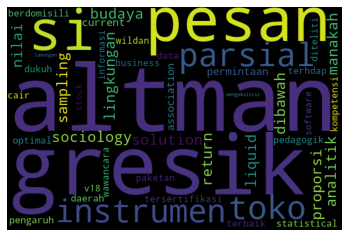

In [31]:
# topic 0
draw_word_cloud(0)

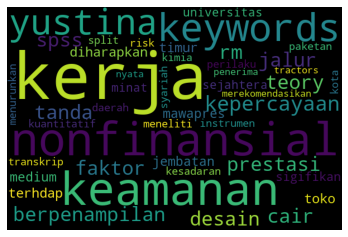

In [32]:
# topic 1
draw_word_cloud(1)  # ...